# Training Neural Network Using Transfer Learning

## The Key Challenges with this Problem Statement are:

### 1) Lack of Labeled Dataset
Even though there are many images in the given URL for the challenge, the images alongwith their metadata occupy a lot of space on disk. A set of 884 images proved to be bigger than 20GB when fetched from the given URL. Thus, I continued my work with a dataset of just 884 images divided among 3 classes to be able to save this data on cloud at low cost.

### 2) Size of the Dataset on Disk and Memory
All images need big space on Disk and RAM. Along with preprocessing before training the neural network can take a lot of time


## Benefits of using Transfer Learning and MobileNet V2

### 1) Good Accuracy with Less Data
Since, in transfer learning instead of training filters we copy them from other networks which were trained on huge sets of data, the filters we get are well trained. Thus, helping us get better accuracy than possible with our limited data

### 2) Ease of Deployment on Cloud for Production
MobileNet V2 is one of the most advanced neural network present which was trained on ImageNet 1000 and optimised for memory and speed using post-training optimization techniques. Transfer learning this network for our purpose not only gives us good accuracy but results in a neural network which is light in memory and has fast execution times. When deployed on cloud, this would prove to be very cost effective.

In [1]:
"""
Created on Tue Sep  3 17:39:02 2019

@author: Raghav Avasthi
"""

from __future__ import absolute_import, division, print_function, unicode_literals
import os
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

C:\MyPrograms\Anaconda3\envs\keras36\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\MyPrograms\Anaconda3\envs\keras36\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\MyPrograms\Anaconda3\envs\keras36\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\MyPrograms\Anaconda3\envs\keras36\lib\site-packages\tensorflow\pyth

In [2]:
# Defining paths of directories holding data for training and validation
data_dir = r"C:\Users\Raghav Avasthi\Desktop\mouse brain\Brain_Dataset_Color_Pre" 
train_dir = os.path.join(data_dir, 'train')
validation_dir = os.path.join(data_dir, 'validate')

In [3]:
image_size = 224 # All images will be resized to 224 x 224
batch_size = 32 # Refers to the number of images which will be trained on, together

train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

validation_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                train_dir,  # Source directory for the training images
                target_size=(image_size, image_size),
                batch_size=batch_size,
                # Since we use categorical_crossentropy loss, we need categorical labels
                class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
                validation_dir, # Source directory for the validation images
                target_size=(image_size, image_size),
                batch_size=batch_size,
                class_mode='categorical')

Found 737 images belonging to 3 classes.
Found 144 images belonging to 3 classes.


In [4]:
IMG_SHAPE = (image_size, image_size, 3)
# Create the base model from the pre-trained model MobileNet V2
# The base model does not have the classification layer. It only carries the trained weights from the filters
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

base_model.trainable = False

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
# Creating a new classification layer to be put over the base layer from MobileNet V2
model = tf.keras.Sequential([
  base_model,
  keras.layers.GlobalAveragePooling2D(),
  keras.layers.Dense(3, activation='softmax') 
])

# Compiling the new classification layer over the trained layers from MobileNet V2
model.compile(optimizer=tf.keras.optimizers.Adam(), # Defining the optimizer, ADAM proves to be the best in such situations
              loss='categorical_crossentropy', # Defining this specific loss as there are more than 2 classes and it's a classification problem
              metrics=['accuracy'])

In [6]:
epochs = 8
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size

# Training the netwrok and saving the train log
history = model.fit_generator(train_generator,
                              steps_per_epoch = steps_per_epoch,
                              epochs=epochs,
                              workers=4,
                              validation_data=validation_generator,
                              validation_steps=validation_steps)

Instructions for updating:
Use tf.cast instead.
Epoch 1/8
24/24 [==============================] - 207s 9s/step - loss: 0.5829 - acc: 0.7598 - val_loss: 0.7428 - val_acc: 0.7222
Epoch 2/8
24/24 [==============================] - 205s 9s/step - loss: 0.2422 - acc: 0.9498 - val_loss: 0.7037 - val_acc: 0.7222
Epoch 3/8
24/24 [==============================] - 207s 9s/step - loss: 0.1617 - acc: 0.9756 - val_loss: 0.7446 - val_acc: 0.6944
Epoch 4/8
24/24 [==============================] - 195s 8s/step - loss: 0.2560 - acc: 0.9688 - val_loss: 0.3950 - val_acc: 0.8194
Epoch 5/8
24/24 [==============================] - 200s 8s/step - loss: 0.1602 - acc: 0.9647 - val_loss: 0.7903 - val_acc: 0.7361
Epoch 6/8
24/24 [==============================] - 205s 9s/step - loss: 0.1264 - acc: 0.9810 - val_loss: 0.6211 - val_acc: 0.7222
Epoch 7/8
24/24 [==============================] - 200s 8s/step - loss: 0.1771 - acc: 0.9769 - val_loss: 0.5022 - val_acc: 0.7917
Epoch 8/8
24/24 [=========================

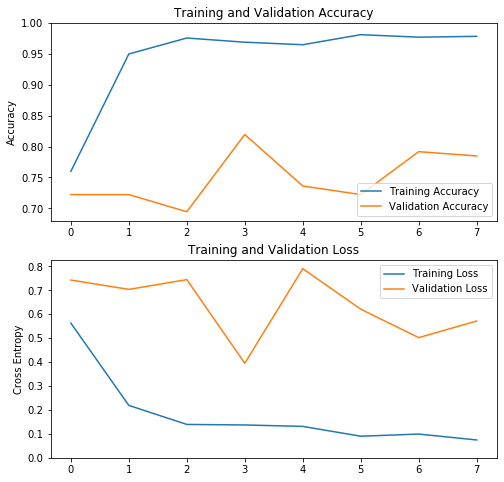

In [7]:
# Displaying the graphs showing comparisons between training and validation accuracy and loss respectively
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()

## Looking at the graphs one can say that there is no indication of overfitting here.

## Fine Tuning the Network 

The concept of fin tuning extends the idea of transfer learning as it argues that one can unfreeze the base layers and train a few of them to get better accuracy. The idea originates from the observation that early filters in CNN learn very basic and general patterns and as you deeper into the neural network, the filters learn more complex and data orieanted features and patterns. Thus, one can retrain or say tweak the deeper layers to get better accuracy for one's custom dataset. 

In [8]:
base_model.trainable = True

In [9]:
# MobileNet V2 has 155 layers, here we choose to freeze the first 100 layers and unfreeze the rest
fine_tune_at = 100 

for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

In [10]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
history_fine = model.fit_generator(train_generator,
                                   steps_per_epoch = steps_per_epoch,
                                   epochs=epochs,
                                   workers=4,
                                   validation_data=validation_generator,
                                   validation_steps=validation_steps)

Epoch 1/8
24/24 [==============================] - 292s 12s/step - loss: 0.1539 - acc: 0.9647 - val_loss: 0.8112 - val_acc: 0.8264
Epoch 2/8
24/24 [==============================] - 281s 12s/step - loss: 0.2322 - acc: 0.9919 - val_loss: 1.8415 - val_acc: 0.7708
Epoch 3/8
24/24 [==============================] - 287s 12s/step - loss: 0.3015 - acc: 0.9905 - val_loss: 0.9318 - val_acc: 0.9097
Epoch 4/8
24/24 [==============================] - 288s 12s/step - loss: 0.1516 - acc: 0.9959 - val_loss: 1.8433 - val_acc: 0.7431
Epoch 5/8
24/24 [==============================] - 296s 12s/step - loss: 0.2995 - acc: 0.9891 - val_loss: 2.1199 - val_acc: 0.8056
Epoch 6/8
24/24 [==============================] - 287s 12s/step - loss: 0.0418 - acc: 1.0000 - val_loss: 3.6110 - val_acc: 0.5625
Epoch 7/8
24/24 [==============================] - 294s 12s/step - loss: 0.1202 - acc: 0.9986 - val_loss: 1.4032 - val_acc: 0.7292
Epoch 8/8
24/24 [==============================] - 294s 12s/step - loss: 0.1157 - a

In [12]:
acc += history_fine.history['acc']
val_acc += history_fine.history['val_acc']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

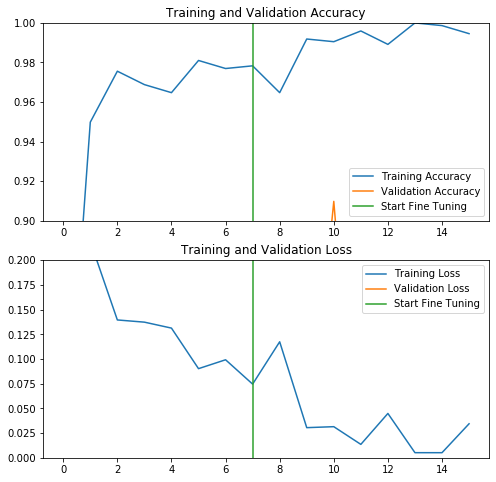

In [13]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.9, 1])
plt.plot([epochs-1,epochs-1], plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 0.2])
plt.plot([epochs-1,epochs-1], plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Evidently, fine tuning a few of the feature layers have certainly improved the accuracy of the model

## Saving the trained Model

In [16]:
model.save('mouse_brain_model.h5')